In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_input = pd.read_csv("data.csv")

In [5]:
df_input

,x,y
0,-1.0,-1.656
1,-0.9,-0.734
2,-0.8,-3.036
3,-0.7,-1.026
4,-0.6,-1.104
5,-0.5,0.023
6,-0.4,0.246
7,-0.3,1.817
8,-0.2,0.651
9,-0.1,0.082


In [6]:
%ls

Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
competitive-data-science-predict-future-sales.ipynb
data.csv
data.txt
image.png


In [7]:
data = np.loadtxt("data.txt")

In [8]:
data.T[0]

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [10]:
df_input["x"].values

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [11]:
x = df_input["x"].values

In [12]:
y = df_input["y"].values

In [14]:
n_sample = x.size

In [16]:
n_sample

20

In [17]:
np.repeat(1, n_sample)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
X = np.column_stack((np.repeat(1, n_sample), np.repeat(2, n_sample)))

In [27]:
print(X)

[[1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]]


In [28]:
print(np.repeat(1, n_sample))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [29]:
X = np.column_stack((np.repeat(1, n_sample), x))

In [32]:
print(np.row_stack((np.repeat(1, n_sample), x)))

[[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1. ]
 [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
   0.4  0.5  0.6  0.7  0.8  0.9]]


In [33]:
model = sm.OLS(y, X)

In [34]:
results = model.fit()

In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     88.59
Date:                Fri, 03 May 2019   Prob (F-statistic):           2.25e-08
Time:                        16:48:35   Log-Likelihood:                -24.450
No. Observations:                  20   AIC:                             52.90
Df Residuals:                      18   BIC:                             54.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2922      0.194      6.647      0.0

In [36]:
a, b = results.params

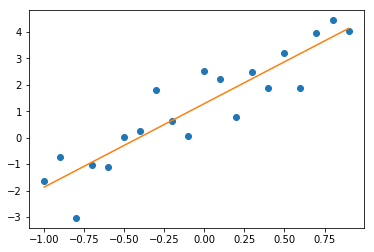

In [37]:
plt.plot(x, y, 'o')
plt.plot(x, a+b*x)
plt.show()

In [38]:
df_input2 = pd.read_csv("data2.csv")

In [39]:
x = df_input2.x

In [40]:
y = df_input2.y

In [41]:
n_sample = x.size

In [44]:
X = np.column_stack((np.repeat(1, n_sample), x, x**2))

In [49]:
X

array([[ 1.  , -2.  ,  4.  ],
       [ 1.  , -1.8 ,  3.24],
       [ 1.  , -1.6 ,  2.56],
       [ 1.  , -1.4 ,  1.96],
       [ 1.  , -1.2 ,  1.44],
       [ 1.  , -1.  ,  1.  ],
       [ 1.  , -0.8 ,  0.64],
       [ 1.  , -0.6 ,  0.36],
       [ 1.  , -0.4 ,  0.16],
       [ 1.  , -0.2 ,  0.04],
       [ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  0.2 ,  0.04],
       [ 1.  ,  0.4 ,  0.16],
       [ 1.  ,  0.6 ,  0.36],
       [ 1.  ,  0.8 ,  0.64],
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.2 ,  1.44],
       [ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  1.6 ,  2.56],
       [ 1.  ,  1.8 ,  3.24]])

In [50]:
model = sm.OLS(y, X)

In [51]:
results = model.fit()

In [53]:
a, b, c = results.params

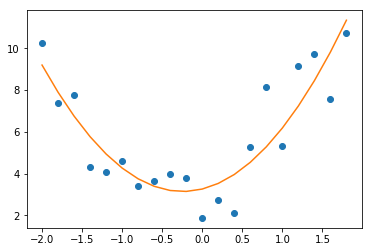

In [54]:
plt.plot(x, y, 'o')
plt.plot(x, a+b*x+c*x**2)
plt.show()